# Tensorflow Speech Recognition

# 코랩 API 세팅

**코랩 API 세팅**

In [ ]:
!pip install kaggle --upgrade

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'jieunc'
os.environ['KAGGLE_KEY'] = 'cc2fe5f93d99e1806b011651482b41fd'

In [ ]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


**Kaggle Dataset Download**

In [ ]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

 98% 1.03G/1.04G [00:07<00:00, 170MB/s]
100% 1.04G/1.04G [00:07<00:00, 156MB/s]
  0% 0.00/501k [00:00<?, ?B/s]
100% 501k/501k [00:00<00:00, 166MB/s]
  0% 0.00/50.0 [00:00<?, ?B/s]
100% 50.0/50.0 [00:00<00:00, 50.4kB/s]
100% 2.46G/2.46G [00:23<00:00, 46.7MB/s]
100% 2.46G/2.46G [00:23<00:00, 113MB/s] 


In [ ]:
!ls

link_to_gcp_credits_form.txt  sample_submission.7z  train.7z
sample_data		      test.7z


**7z 파일 압축 해제**

In [ ]:
!p7zip -d '/content/train.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 1121103842 bytes (1070 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      0% 39 - train/audio/_background_noise_/dude_miaowing.wav                                                            0% 41 - train/audio/_background_noise_/pink_noise.wav                                                         0% 42 - tra

In [ ]:
!p7zip -d '/content/test.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 2640679130 bytes (2519 MiB)

Extracting archive: /content/test.7z
--
Path = /content/test.7z
Type = 7z
Physical Size = 2640679130
Headers Size = 1345163
Method = Delta LZMA2:24
Solid = +
Blocks = 3

  0%      0% 149 - test/audio/clip_0038827a4.wav                                          0% 312 - test/audio/clip_007fbacc4.wav                                          0% 478 - test/audio/clip_00d1c23d9.wav                                        

In [ ]:
!p7zip -d '/content/sample_submission.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 512684 bytes (501 KiB)

Extracting archive: /content/sample_submission.7z
--
Path = /content/sample_submission.7z
Type = 7z
Physical Size = 512684
Headers Size = 146
Method = LZMA2:6m
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       4280538
Compressed: 512684


**module import**

In [ ]:
!pip install pyunpack
!pip install patool
!pip install wave

     |████████████████████████████████| 77 kB 4.3 MB/s 
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1238 sha256=c2183d2e5d072f3ac0ea942413b5f7edfe886deab7d73ae19b92dec0ac97899e
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [ ]:
#import os
from os import listdir
from os.path import join
import shutil
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import scipy
from scipy import signal
from scipy.io import wavfile

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

#for model architecture
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
#
from keras.models import load_model
import random

In [ ]:
train_audio_path = "/content/train/audio"

In [ ]:
#print(check_output(["ls", "/content/train/audio"]).decode("utf8"))
print(os.listdir("/content/train/audio/yes"))

['66a412a7_nohash_0.wav', '52bfbce8_nohash_1.wav', 'dca2797e_nohash_4.wav', '0132a06d_nohash_3.wav', 'd069e6ff_nohash_0.wav', '5fe4a278_nohash_0.wav', '3389305e_nohash_1.wav', '611d2b50_nohash_4.wav', '96d5276f_nohash_1.wav', 'b97c9f77_nohash_2.wav', '3402e488_nohash_4.wav', 'df6bd83f_nohash_0.wav', 'c120e80e_nohash_7.wav', 'fcb25a78_nohash_0.wav', 'd0faf7e4_nohash_6.wav', '409c962a_nohash_0.wav', 'aa753bb9_nohash_2.wav', '918a2473_nohash_4.wav', '413997c1_nohash_1.wav', 'e8d562ca_nohash_0.wav', 'd9b8fab2_nohash_0.wav', 'e41a903b_nohash_0.wav', 'c099668c_nohash_2.wav', '888a0c49_nohash_1.wav', '1ed557b9_nohash_0.wav', '9aa21fa9_nohash_4.wav', '7b301939_nohash_0.wav', '56eb74ae_nohash_0.wav', '3c257192_nohash_3.wav', '11321027_nohash_0.wav', '06a79a03_nohash_1.wav', '8d9cc260_nohash_2.wav', '692a88e6_nohash_4.wav', 'b9f46737_nohash_1.wav', '80f056c0_nohash_1.wav', 'bed06fac_nohash_0.wav', '0685264e_nohash_0.wav', '38d78313_nohash_1.wav', 'fa44fcf5_nohash_2.wav', 'fac74f6a_nohash_1.wav',

In [ ]:
filename = '/yes/66a412a7_nohash_0.wav'

In [ ]:
dirs = [f for f in os.listdir(train_audio_path) if os.path.isdir(join(train_audio_path, f))]
dirs.sort()
print('Number of labels: ' + str(len(dirs)))

Number of labels: 31


In [ ]:
samples, sample_rate = librosa.load(str(train_audio_path)+filename)

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# 데이터 시각화

**data visualization**

Text(0.5, 0, 'Seconds')

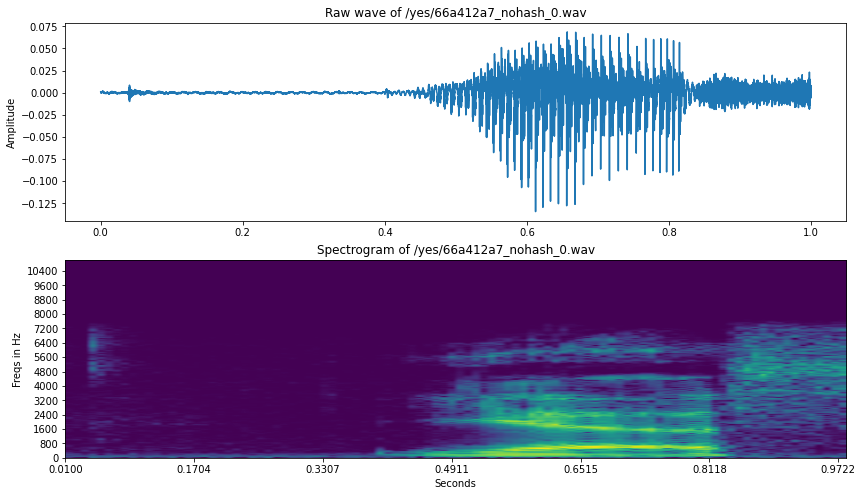

In [ ]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

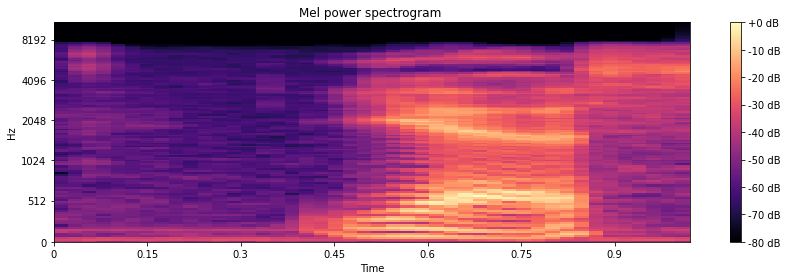

In [ ]:
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

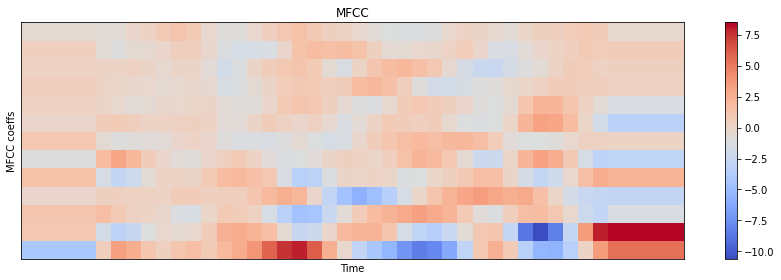

In [ ]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

*mfcc 과정?

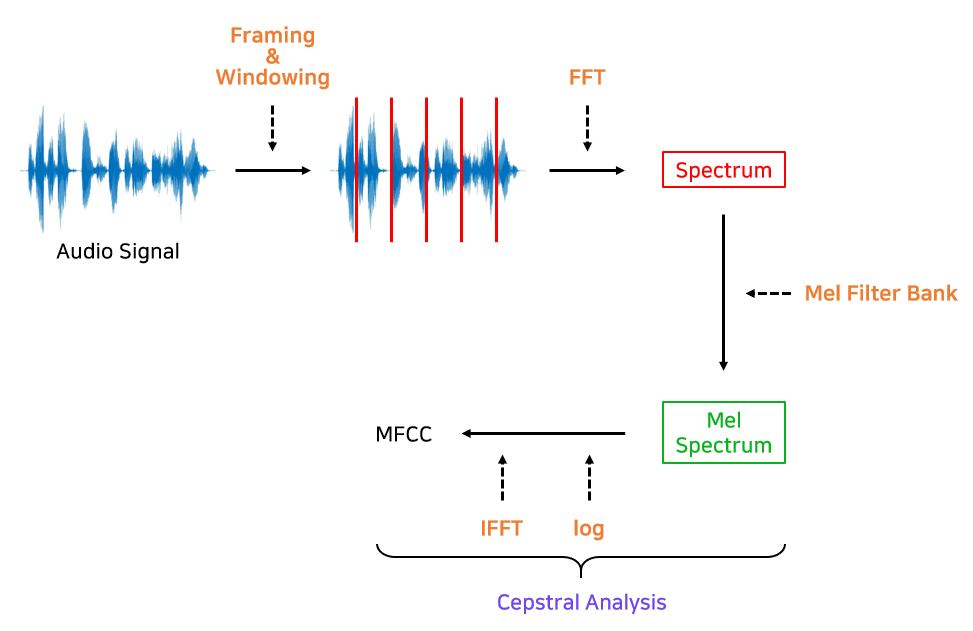

**Sampling rate**

In [ ]:
ipd.Audio(samples, rate=sample_rate)

In [ ]:
print(sample_rate)

22050


**Resampling**

In [ ]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [ ]:
labels = os.listdir(train_audio_path)

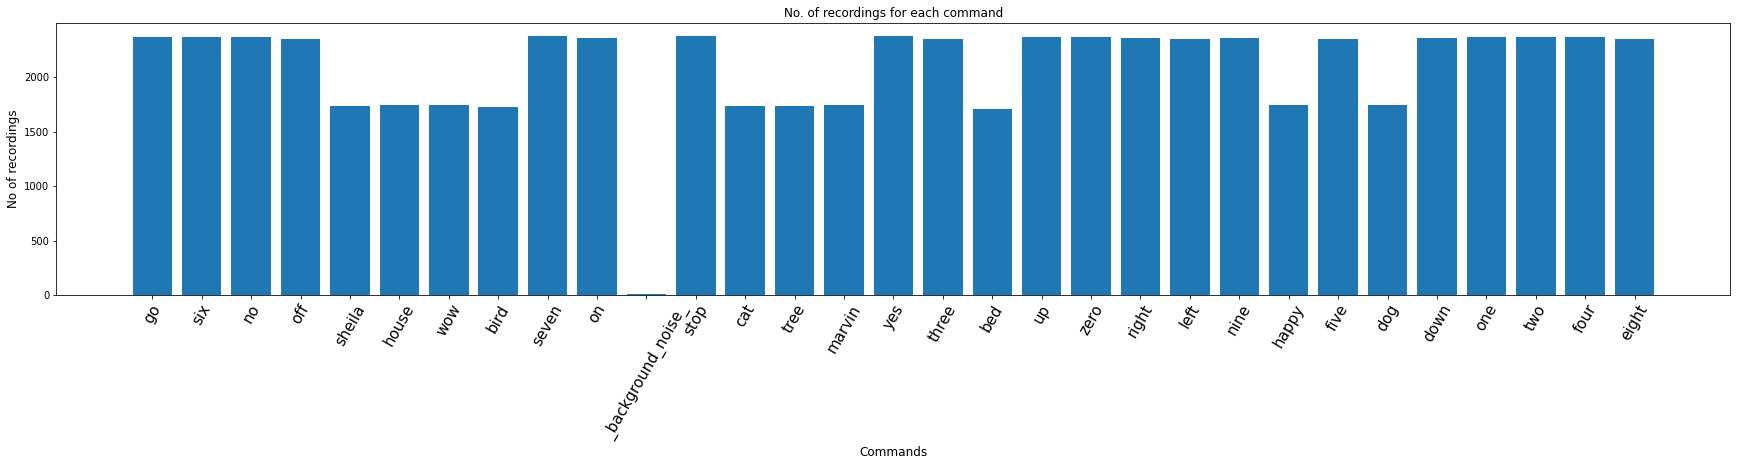

In [ ]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [ ]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

**Duration of recordings**

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <a list of 10 Patch objects>)

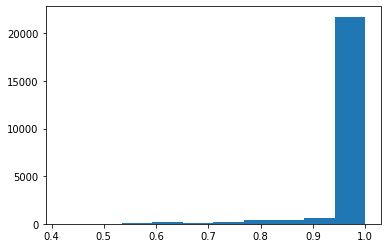

In [ ]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

# 데이터 전처리

In [ ]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [ ]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [ ]:
print(all_wave[1].shape)
all_wave[1]

(8000,)


array([-2.9244671e-05, -5.3160591e-05,  6.2760839e-05, ...,
        2.1135911e-05, -1.6436394e-04, -1.1221405e-04], dtype=float32)

In [ ]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [ ]:
y=np_utils.to_categorical(y, num_classes=len(labels))

In [ ]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [ ]:
all_wave.shape

(21312, 8000, 1)

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

# 모델 구현

**Model**

In [ ]:
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

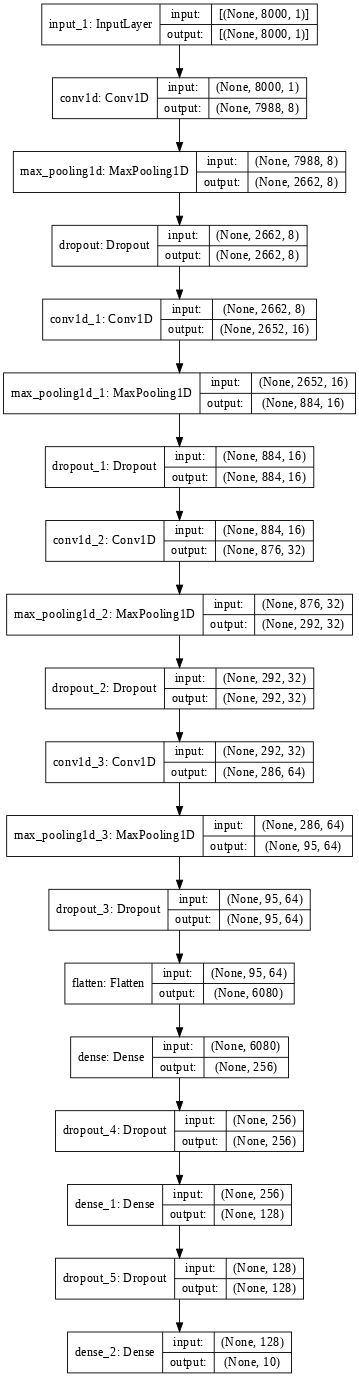

In [ ]:
#model visualization
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi=64)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# 모델 훈련(epoch 100)

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
533/533 [==============================] - 35s 12ms/step - loss: 2.2625 - accuracy: 0.1294 - val_loss: 2.1898 - val_accuracy: 0.1823
Epoch 2/100
533/533 [==============================] - 5s 10ms/step - loss: 1.8037 - accuracy: 0.3162 - val_loss: 1.5871 - val_accuracy: 0.4061
Epoch 3/100
533/533 [==============================] - 6s 12ms/step - loss: 1.3579 - accuracy: 0.4902 - val_loss: 1.1355 - val_accuracy: 0.6078
Epoch 4/100
533/533 [==============================] - 5s 10ms/step - loss: 1.0951 - accuracy: 0.6031 - val_loss: 1.1964 - val_accuracy: 0.5780
Epoch 5/100
533/533 [==============================] - 6s 11ms/step - loss: 0.9506 - accuracy: 0.6605 - val_loss: 1.0903 - val_accuracy: 0.6296
Epoch 6/100
533/533 [==============================] - 5s 10ms/step - loss: 0.8316 - accuracy: 0.7053 - val_loss: 0.7605 - val_accuracy: 0.7410
Epoch 7/100
533/533 [==============================] - 5s 10ms/step - loss: 0.7722 - accuracy: 0.7257 - val_loss: 0.7124 - val_accuracy

**Diagnostic plot**

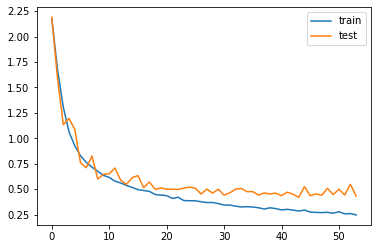

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

-----

**Loading the best model**

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: left


In [ ]:
print("Text:",predict(samples))

Text: left


In [ ]:
! pip install sounddevice==0.2.1

     |████████████████████████████████| 104 kB 8.3 MB/s 


In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (196 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160837 files and directories currently installed.)
Preparing to 

In [ ]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start


PortAudioError: ignored

In [ ]:
#reading the voice commands
samples, sample_rate = librosa.load('/content/train/audio/stop.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

FileNotFoundError: ignored

In [ ]:
#converting voice commands to text
predict(samples)

'left'

ref: https://www.kaggle.com/aggarwalrahul/nlp-speech-recognition-model-dev
ref1: http://speech.cbnu.ac.kr/srhome/technology/index.html